# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [87]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [88]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [89]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [90]:
#split into train and test data (code from lecture notebook)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=10000)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

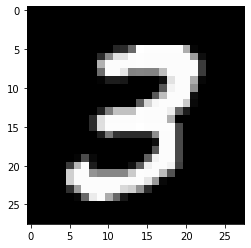

In [91]:
plt.imshow(np.reshape(X[7,:],(28,28)),cmap='gray')

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [92]:
from sklearn.naive_bayes import GaussianNB as GNB

In [93]:
NBm = GNB()
NBm.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Always scale the input. The most convenient way is to use a pipeline.
SGDCm = make_pipeline(StandardScaler(), SGDClassifier(max_iter=100, tol=1e-3))
SGDCm.fit(X_train, y_train)


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=100, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [97]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFCm = RandomForestClassifier(max_depth=5, random_state=0)
RFCm.fit(X_train, y_train)

CPU times: user 11 s, sys: 51.9 ms, total: 11 s
Wall time: 11 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [117]:
res_y_test_NB = NBm.predict(X_test)
res_y_test_SGDC = SGDCm.predict(X_test)
res_y_test_RFC = RFCm.predict(X_test)


In [206]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,plot_roc_curve,RocCurveDisplay,auc

In [193]:
print('Nb acc_score: \t',accuracy_score(y_test,res_y_test_NB), 
      '\nSGDC acc_score: ', accuracy_score(y_test,res_y_test_SGDC),
     ' \nRFC acc_score: \t', accuracy_score(y_test, res_y_test_RFC))

Nb acc_score: 	 0.5516 
SGDC acc_score:  0.9115  
RFC acc_score: 	 0.8473


In [194]:
print('F-Measure',
     '\nNB: ', f1_score(y_test,res_y_test_NB,average = 'macro' ),
     '\nSGDB: ' ,f1_score(y_test,res_y_test_SGDC,average = 'macro'),
     '\nRFC: ', f1_score(y_test,res_y_test_RFC,average = 'macro'))

F-Measure 
NB:  0.5003833456939016 
SGDB:  0.9106455364025985 
RFC:  0.8438201926132614


***ROC CURVE***

In [213]:
y_test_cpy = y_test.astype(np.int)
number = 6

In [229]:
#spec_class = specific class
# gt = ground trouth
y_gt_spec_class = list(map(lambda x:  1 if x == number else 0,y_test_cpy))
res_y_test_spec_class_NB = list(map(lambda x:  1 if x == number else 0,res_y_test_NB.astype(np.int)))
res_y_test_spec_class_SGDC = list(map(lambda x:  1 if x == number else 0,res_y_test_SGDC.astype(np.int)))
res_y_test_spec_class_RFC = list(map(lambda x:  1 if x == number else 0,res_y_test_RFC.astype(np.int)))

In [230]:
NB_fpr, NB_tpr,NB_ths = roc_curve(y_gt_spec_class,res_y_test_spec_class_NB,pos_label=1)
SGDC_fpr, SGDC_tpr,SGDC_ths = roc_curve(y_gt_spec_class,res_y_test_spec_class_SGDC,pos_label=1)
RFC_fpr, RFC_tpr,NRFC_ths = roc_curve(y_gt_spec_class,res_y_test_spec_class_RFC,pos_label=1)

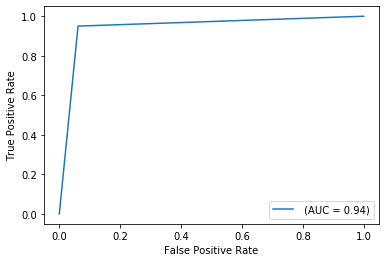

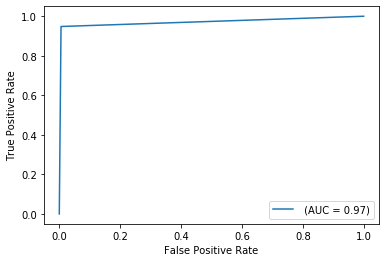

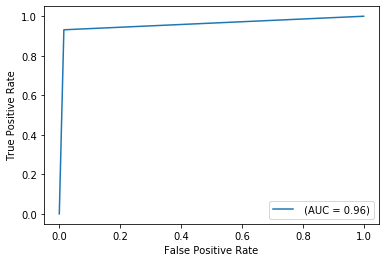

In [231]:
roc_auc = auc(NB_fpr,NB_tpr)
dis_NB = RocCurveDisplay(fpr = NB_fpr, tpr = NB_tpr,roc_auc=roc_auc,estimator_name="")

roc_auc = auc(SGDC_fpr,SGDC_tpr)
dis_SGDC = RocCurveDisplay(fpr = SGDC_fpr, tpr = SGDC_tpr,roc_auc=roc_auc,estimator_name="")

roc_auc = auc(RFC_fpr,RFC_tpr)
dis_RFC = RocCurveDisplay(fpr = RFC_fpr, tpr = RFC_tpr,roc_auc=roc_auc,estimator_name="")

dis_NB.plot()
dis_SGDC.plot()
dis_RFC.plot()
plt.show()

In [223]:
print(res_y_test_spec_class_NB)

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 